In [6]:
# install required libraries
# !pip install numpy
# !pip install pandas

# import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

We are going to be using the ANES data set, which contains survey responses regarding political attitudes from before and after the 2016 presidential election.

In [7]:
anes_raw = pd.read_csv('../data/anes/ANES_legalst123.csv')
anes_raw.head()

,V160101f,V160102f,V161024x,V161140x,V161158x,V161188,V161192,V161194x,V161198,V161204x,...,V162362,V162363,V162364,V162365,V162366,V162367,V162368,V162369,V168112,V168113
0,0.887,0.927,3,5,7,2,3,4,7,4,...,4,3,4,4,4,-4,3,4,4,4
1,1.160,1.084,3,3,6,1,1,1,7,6,...,3,3,1,4,1,-4,3,4,1,2
2,0.416,0.398,1,3,3,2,1,7,7,4,...,2,3,1,2,1,-4,2,4,4,3
3,0.385,0.418,4,3,5,1,3,4,5,6,...,3,3,2,3,2,-4,4,4,2,2
4,0.693,0.726,3,3,3,1,3,6,7,7,...,2,4,3,2,3,-4,2,5,4,3


### Renaming Columns

Wow that's a lot of data! You may have gotten a warning that some columns contain mixed data types, and you may also have noticed that our column names are not very informative. This means we need to clean our data before we can use it.

First, let's rename our columns so that it is more clear what kind of information they contain. To do this we can use the `rename` method for `pandas` dataframes. You can find the documentation for this method [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html).

For more basic statistics and more information about what these column names mean, please refer to the codebook.

In [8]:
# Dictionary to pass to `rename` mapping the old name to the new name.
# Feel free to look through this to see the kind of attitudes this survey aimed to capture.
# If in the future you'd like to refer go back to the codebook for more information about what a column name
# means, you can use this as a reference to find the column ID in the codebook.
new_names = {
    "V160101f": "pre_election_weight_ftf",
    "V160102f": "post_election_weight_ftf",
    "V161024x": "pre_voting_status",
    "V161140x": "pre_economy_last_year",
    "V161158x": "pre_party_id",
    "V161188": "pre_gun_access_importance",
    "V161192": "pre_unauthorized_immigrants",
    "V161194x": "pre_birthright_citizenship",
    "V161198": "pre_govt_assist_to_blacks",
    "V161204x": "pre_affirmative_action",
    "V161208": "pre_crime_budget",
    "V161209": "pre_welfare_budget",
    "V161210": "pre_childcare_budget",
    "V161211": "pre_aid_to_poor_budget",
    "V161212": "pre_environment_budget",
    "V161213x": "pre_troops_to_fight_isis",
    "V161214x": "pre_syrian_refugees",
    "V161215": "pre_trust_washington",
    "V161216": "pre_interests_of_few_or_many",
    "V161217": "pre_govt_waste_tax_money",
    "V161218": "pre_govt_corruption",
    "V161219": "pre_are_people_trustworthy",
    "V161220": "pre_govt_attention",
    "V161221": "pre_global_warming",
    "V161225x": "pre_govt_action_rising_temp",
    "V161227x": "pre_govt_services_same_sex_couples",
    "V161228x": "pre_transgender_policy",
    "V161229x": "pre_lgbt_protection_laws",
    "V161231": "pre_gay_marriage",
    "V161232": "pre_abortion",
    "V161233x": "pre_death_penalty",
    "V161235x": "pre_economy_since_2008",
    "V161236": "pre_angry_at_obama",
    "V161237": "pre_proud_of_obama",
    "V161241": "pre_religion_importance",
    "V161242": "pre_religion_provides_guidance",
    "V161243": "pre_bible_word_of_got_or_men",
    "V161244": "pre_attend_religions_services",
    "V161245": "pre_how_often_religious_services",
    "V161267x": "pre_age_group",
    "V161268": "pre_marital_status",
    "V161270": "pre_education_level",
    "V161276x": "pre_occupation_status",
    "V161310x": "pre_race",
    "V161316": "pre_place_of_birth",
    "V161324": "pre_children_in_household",
    "V161326": "pre_home_internet_use",
    "V161327": "pre_cell_or_landline",
    "V161331x": "pre_length_in_current_coummunity",
    "V161334": "pre_home_ownership",
    "V161340": "pre_unexpired_passport",
    "V161342": "pre_gender",
    "V161343": "pre_roughing_up_protestors",
    "V161344": "pre_justified_use_of_violence",
    "V161345": "pre_feminist",
    "V161361x": "pre_income",
    "V161362": "pre_political_correctness",
    "V161496": "pre_gun_ownership",
    "V161507": "pre_sexist_remarks",
    "V161508": "pre_women_appreciating_men",
    "V161509": "pre_women_power_over_men",
    "V161510": "pre_men_on_leash",
    "V161511": "pre_sexual_orientation",
    "V161515": "pre_party_representation_house",
    "V161516": "pre_party_representation_senate",
    "V161522": "pre_general_satisfaction",
    "V162010": "pre_talk_about_voting",
    "V162011": "pre_political_meetings",
    "V162012": "pre_political_visibility",
    "V162013": "pre_work_for_party",
    "V162014": "pre_monetary_contribution_to_party",
    "V162014a": "pre_party_contributed_to",
    "V162016": "post_monetary_contribution_to_party",
    "V162016a": "post_party_contributed_to",
    "V162018a": "post_protest_participation",
    "V162018b": "post_signed_petition",
    "V162018c": "post_give_money_to_relig_org",
    "V162018d": "post_give_money_to_soc_pol_org",
    "V162018e": "post_social_media_political_message",
    "V162019": "post_contact_representative",
    "V162030x": "post_party_registration",
    "V162031x": "post_voted_in_2016",
    "V162062x": "post_pres_vote_admin",
    "V162066x": "post_strength_of_vote",
    "V162067x": "post_house_vote",
    "V162068x": "post_senate_vote",
    "V162069x": "post_governor_vote",
    "V162078": "post_clinton_rating",
    "V162079": "post_trump_rating",
    "V162095": "post_christian_fundamentalist_rating",
    "V162096": "post_feminist_rating",
    "V162097": "post_liberal_rating",
    "V162098": "post_labor_unions_rating",
    "V162099": "post_poor_people_rating",
    "V162100": "post_big_business_rating",
    "V162101": "post_conservative_rating",
    "V162102": "post_supreme_court_rating",
    "V162103": "post_lgbt_rating",
    "V162104": "post_congress_rating",
    "V162105": "post_rich_people_rating",
    "V162106": "post_muslims_rating",
    "V162107": "post_christians_rating",
    "V162108": "post_jews_rating",
    "V162109": "post_tea_party_rating",
    "V162110": "post_police_rating",
    "V162111": "post_transgender_rating",
    "V162112": "post_scientists_rating",
    "V162113": "post_blm_rating",
    "V162123": "post_world_like_america",
    "V162125x": "post_american_flag",
    "V162136x": "post_economic_mobility",
    "V162147x": "post_vaccines",
    "V162150x": "post_gender_income_equality",
    "V162157": "post_immigration_levels",
    "V162158": "post_immigration_takes_away_jobs",
    "V162160": "post_worry_terrorist_attack",
    "V162168": "post_need_free_thinkers",
    "V162169": "post_rotten_apples",
    "V162170": "post_strong_leader",
    "V162171": "post_liberal_conservative",
    "V162174a": "post_discuss_politics",
    "V162178": "post_wiretaps",
    "V162179": "post_marijuana",
    "V162180x": "post_bank_regulation",
    "V162188x": "post_trump_towards_women",
    "V162191a": "post_which_is_conservative_party",
    "V162193x": "post_healthcare_spending",
    "V162207": "post_attitude_toward_changing_world",
    "V162209": "post_tolerate_other_morals",
    "V162210": "post_trad_values",
    "V162211": "post_no_favors_for_blacks",
    "V162212": "post_slavery_impact",
    "V162213": "post_blacks_deserve_more",
    "V162214": "post_blacks_should_try_harder",
    "V162229x": "post_bond_with_child",
    "V162230x": "post_man_works",
    "V162231x": "post_women_discrimination",
    "V162238x": "post_preferential_hiring",
    "V162239": "post_child_indep_respect",
    "V162240": "post_child_curiosity_manners",
    "V162241": "post_child_obedience_self_reliance",
    "V162242": "post_child_considerate_behave",
    "V162254": "post_govt_knew_9_11",
    "V162255x": "post_obama_muslim",
    "V162262": "post_politicians_are_problem",
    "V162263": "post_strong_leader_bend_rules",
    "V162266": "post_minorities_should_adapt",
    "V162268": "post_immigrants_good_for_economy",
    "V162269": "post_immigrants_harm_culture",
    "V162270": "post_immigrants_increase_crime",
    "V162271": "post_truly_american_us_born",
    "V162272": "post_truly_american_us_ancestry",
    "V162273": "post_truly_american_speak_english",
    "V162274": "post_truly_american_follow_trad",
    "V162290": "post_satisfied_with_democracy",
    "V162310": "post_asian_american_feeling_therm",
    "V162311": "post_hispanics_feeling_therm",
    "V162312": "post_blacks_feeling_therm",
    "V162313": "post_illegal_imm_feeling_therm",
    "V162314": "post_whites_feeling_therm",
    "V162316": "post_whites_work_together",
    "V162317": "post_hiring_minorities",
    "V162318": "post_govt_treatment_whites_blacks",
    "V162319": "post_govt_treatment_degree",
    "V162320": "post_police_treatment_whites_blacks",
    "V162321": "post_police_treatment_degree",
    "V162322": "post_white_influence",
    "V162323": "post_black_influence",
    "V162324": "post_hispanic_influence",
    "V162325": "post_asian_influence",
    "V162345": "post_whites_hardworking",
    "V162346": "post_blacks_hardworking",
    "V162347": "post_hispanics_hardworking",
    "V162348": "post_asians_hardworking",
    "V162349": "post_whites_violent",
    "V162350": "post_blacks_violent",
    "V162351": "post_hispanics_violent",
    "V162352": "post_asians_violent",
    "V162353": "post_muslims_violent",
    "V162354": "post_christians_violent",
    "V162355": "post_muslims_patriotic",
    "V162356": "post_christians_patriotic",
    "V162357": "post_discrim_blacks",
    "V162358": "post_discrim_hispanics",
    "V162359": "post_discrim_asians",
    "V162360": "post_discrim_whites",
    "V162361": "post_discrim_lgbt",
    "V162362": "post_discrim_women",
    "V162363": "post_discrim_men",
    "V162364": "post_discrim_muslim",
    "V162365": "post_discrim_christian",
    "V162366": "post_discrim_transgender",
    "V162367": "post_discrim_personal",
    "V162368": "post_skintone",
    "V162369": "post_discrim_skintone",
    "V168112": "post_inform_level",
    "V168113": "post_intelligence"
}

In [9]:
anes = anes_raw.rename(index = str, columns=new_names)
anes.head()

,pre_election_weight_ftf,post_election_weight_ftf,pre_voting_status,pre_economy_last_year,pre_party_id,pre_gun_access_importance,pre_unauthorized_immigrants,pre_birthright_citizenship,pre_govt_assist_to_blacks,pre_affirmative_action,...,post_discrim_women,post_discrim_men,post_discrim_muslim,post_discrim_christian,post_discrim_transgender,post_discrim_personal,post_skintone,post_discrim_skintone,post_inform_level,post_intelligence
0,0.887,0.927,3,5,7,2,3,4,7,4,...,4,3,4,4,4,-4,3,4,4,4
1,1.160,1.084,3,3,6,1,1,1,7,6,...,3,3,1,4,1,-4,3,4,1,2
2,0.416,0.398,1,3,3,2,1,7,7,4,...,2,3,1,2,1,-4,2,4,4,3
3,0.385,0.418,4,3,5,1,3,4,5,6,...,3,3,2,3,2,-4,4,4,2,2
4,0.693,0.726,3,3,3,1,3,6,7,7,...,2,4,3,2,3,-4,2,5,4,3


### Null Values

Our data also contain a lot of missing values. The creators of the survey wanted a way to encode different reasons why a value is missing by assigning different reasons to different negative numbers. However, for our purposes, we would just like to know if a value is missing, so we can just replace these with `np.NaN`. `NaN` stands for "not a number," and is just a handy way for us to indicate missing values.

In [10]:
anes[anes < 0] = np.nan
anes[anes > 100] = np.nan

## Groupby and Summary Statistics

With data this large, it's often difficult to know where to start looking. It's often handy to start by looking at individual columns and getting some basic information about how different variables interact. Groupby operations generally follow a similar format. First `groupby` your category(s) of interest, then select columns to compare, and finally apply `agg`regator function(s). Here's are some examples of what this looks like:

In [11]:
demographics = anes.groupby("post_party_registration")["pre_age_group", "pre_gender"].agg(["mean", "std"])
demographics

pre_age_group           pre_gender          
                                 mean       std       mean       std
post_party_registration                                             
1.0                          7.800000  3.397568   1.620798  0.500377
2.0                          8.309384  3.288774   1.467049  0.502136
4.0                          6.855072  3.314702   1.471888  0.503721
5.0                          7.318182  3.357811   1.652174  0.486985

While looking at categorical data encoded numerically requires a bit of interpretation, we can see from this that roughly equal numbers of men and women from all political parties responded to the survey. Interestingly, Republicans were on average older than Democrats, and Independents tended to be the youngest.

In [12]:
party_by_race = anes.groupby(["pre_race", "post_party_registration"])["pre_income"].agg(['count'])
party_by_race

count
pre_race post_party_registration       
1.0      1.0                        553
         2.0                        572
         4.0                        356
         5.0                         16
2.0      1.0                        150
         2.0                          4
         4.0                         17
         5.0                          1
3.0      1.0                         32
         2.0                         17
         4.0                         25
4.0      1.0                          5
         2.0                          3
         4.0                          1
5.0      1.0                        135
         2.0                         44
         4.0                         61
         5.0                          2
6.0      1.0                         35
         2.0                         22
         4.0                         21
         5.0                          2

From this table, we can see that the vast majority of respondents were white. Is this representative of the voting population of the United States? 

As you can see, you can group by multiple columns, select multiple columns to aggregate on, and even use multiple aggregator functions. More information can be found in the documentation for [`.groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [`.agg`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

Now see if you can use these methods to do your own groupby operation on how the different parties viewed crime spending before the election. Refer back to the dictionary above if you are having trouble finding the name of the column you need.

In [13]:
#YOUR CODE HERE

## Visualizations

### Histograms

Histograms are a nifty way to display quantitative information. The x-axis is typically a quantitative variable of interest, and the y-axis is generally a frequency. Plot a histogram of the losses, and then experiment with the bin sizes.

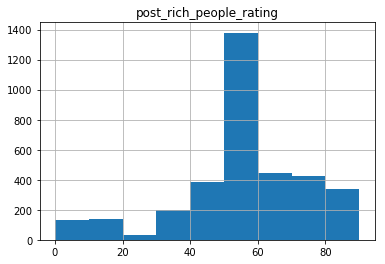

In [14]:
anes.hist('post_rich_people_rating', bins=range(0,100,10));

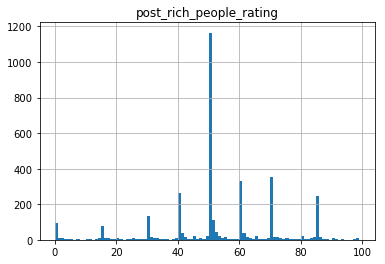

In [15]:
anes.hist('post_rich_people_rating', bins=range(0,100,1));

#### Question 1: Histograms

What happens as you increase the number of bins to 100? Does having too many bins hinder interpretation?

YOUR ANSWER HERE

### Scatter Plots

Scatter plots are generally used to relate two variables to one another. They can be useful when trying to infer relationships between variables, visualize simple regressions, and get a general sense of the "spread" of your data. Run the following code to plot each individual's response about whether minorities should adapt to American culture against the response about whether or speaking English is required to be "truly American."

In [ ]:
# Since our data is all categorical, an unaltered scatterplot would have many overlapping points.
# In order to see all the points so we can better understand the distribution of our data, we can
# use a technique called jittering, where the values are all adjusted slightly by a random amount
# so that they no longer overlap. It's ok if you don't understand what this code is doing!
x = [i + np.random.normal(scale = 0.25) for i in anes["post_minorities_should_adapt"]]
y = [i + np.random.normal(scale = 0.25) for i in anes["post_truly_american_speak_english"]]

plt.scatter(x, y)
plt.xlabel("post_minorities_should_adapt")
plt.ylabel("post_truly_american_speak_english");

#### Question 2: Scatterplots

Looking at the scatterplot above, what can you infer about attitudes towards immigrants? What other variables might you want to compare to corroborate this?

YOUR ANSWER HERE

### Practice with Plots

Practice on your own! Try plotting a histogram and a scatterplot of some variables that you find interesting in the data, then interpret them. Optionally, also try to make a barplot, line graph, or box and whisker plot!

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE

### Probability and Randomness

Next, we'll turn to exercises with probability and randomness in Python. First, let's review how to simulate a coin flip. The following code flips a fair coin 5 times, and saves the results.

In [ ]:
# Create an object that contains the outcome space, "Heads," and "Tails"
coin = np.array(['Heads', 'Tails'])

# Make an empty array that will hold the results
tosses = np.array([])

# Use a for loop to flip the coin, store its results, then do it again 5 times
for i in np.arange(5):
    tosses = np.append(tosses, np.random.choice(coin))

#Return the results
tosses

#### Question 3: Simulate a Dice Roll


Write your own code that simulates a fair dice, and roll the dice 100 times. Plot your results in a histogram. Do the results match what you thought would happen?

In [ ]:
dice = np.array(...)

rolls = np.array([])

for i in np.arange(100):
    rolls = np.append(...)

# YOUR CODE HERE

### Probability Sampling

In the last lab, we learned how to take deterministic samples with the `.iloc[]` function. Now we're going to learn how to do take random samples from the data.

In [ ]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
anes.iloc[np.arange(start, len(anes), 10)].head()

***

You're all done! The plotting functions we used today all have many different parameters that can be adjusted to create different looking graphs. If you have sometime, try playing around with these functions and see what kind of graphs you can make!